# Principal Component Analysis

*The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.*

In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# importing or loading the dataset
dataset = pd.read_csv('winequality-red.csv')

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking Null values

In [7]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# distributing the dataset into two components X and Y
X = dataset.drop('quality',axis=1)
y = dataset.quality

In [9]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [10]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [12]:
explained_variance

array([0.28263119, 0.17942214, 0.1358536 , 0.10862763, 0.08692731,
       0.06008452, 0.0533286 , 0.03926827])

In [13]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [14]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)


In [15]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


In [16]:
from sklearn.metrics import accuracy_score

print(cm)
print('\nAccuracy for Logistic Regression model : ' + str(accuracy_score(y_test, y_pred)))

[[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0 102  32   1   0]
 [  0   0  49  80  13   0]
 [  0   0   1  16  10   0]
 [  0   0   0   1   2   0]]

Accuracy for Logistic Regression model : 0.6


In [17]:
# Fitting Random Forest Classifier To the training set
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=11, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Plotting a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nAccuracy for Random Forest Classifier: ' + str(accuracy_score(y_test, y_pred)))

[[  0   0   1   1   0   0]
 [  0   0   6   5   0   0]
 [  0   0 107  27   1   0]
 [  0   0  24 114   4   0]
 [  0   0   2   8  15   2]
 [  0   0   0   1   2   0]]

Accuracy for Random Forest Classifier: 0.7375


Text(0, 0.5, 'Second Principal Component')

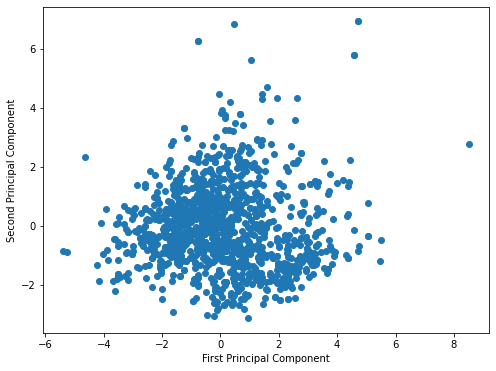

In [18]:
# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1])
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Linear Discriminant Analysis

Linear discriminant analysis is supervised machine learning, the technique used to find a linear combination of features that separates two or more classes of objects or events. 

Linear discriminant analysis, also known as LDA,  does the separation by computing the directions (“linear discriminants”) that represent the axis that enhances the separation between multiple classes. 

Like logistic Regression, LDA to is a linear classification technique, with the following  additional capabilities in comparison to logistic regression.

1.     LDA can be applied to two or more than two-class classification problems.

2.     Unlike Logistic Regression, LDA works better when classes are well separated.

3.     LDA works relatively well in comparison to Logistic Regression when we have few examples.

In [29]:
# Splitting the X and Y into the
# Training set and Testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
# performing preprocessing part
sc = StandardScaler()

X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [32]:
# Applying LDA function on training
# and testing set of X component
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=5)
X1_train = lda.fit_transform(X1_train, y1_train)
X1_test = lda.transform(X1_test)

In [33]:
# Fitting Random Forest Classifier To the training set
classifier = RandomForestClassifier(max_depth=12, random_state=0)

classifier.fit(X1_train, y1_train)
y1_pred = classifier.predict(X1_test)

In [34]:
# Plotting a confusion matrix
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)
print('\nAccuracy for Random Forest Classifier: ' + str(accuracy_score(y1_test, y1_pred)))

[[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0  98  35   2   0]
 [  0   0  29 101  12   0]
 [  0   0   1  11  13   2]
 [  0   0   1   0   2   0]]

Accuracy for Random Forest Classifier: 0.6625


In [35]:
# Fitting Logistic Regression To the training set
classifier = LogisticRegression(random_state = 100)
classifier.fit(X1_train, y1_train)

# Plotting a confusion matrix
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)
print('\nAccuracy for Logistic Regression Classifier: ' + str(accuracy_score(y1_test, y1_pred)))

[[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0  98  35   2   0]
 [  0   0  29 101  12   0]
 [  0   0   1  11  13   2]
 [  0   0   1   0   2   0]]

Accuracy for Logistic Regression Classifier: 0.6625


# **Inference for both techniques in both the models**

From the both techniques applied ,i.e, PCA and LDA , PCA performed better when we obtained the accuracy in the test data though for both they weren't very satisfactory but yet PCA did a better job in it. The fact PCA wasn't utilised to it's full potential maybe that all the features were quite important in the data and were required to predict the new values it came across. Also, Random forest with more depth performed better as we can see that the depth with 11 gave us 73% accuracy.

## Singular Value Decomposition

The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science

In [41]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_ = sc.fit_transform(X)

In [42]:
from sklearn.decomposition import TruncatedSVD

print("Original Matrix:")
print(X_,'\n')

svd =  TruncatedSVD(n_components = 2)
X_tran = svd.fit_transform(X_)

print("Singular values: \n")
print(svd.singular_values_, '\n')

print("Transformed Matrix after reducing to 2 features: \n")
print(X_tran)

Original Matrix:
[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]] 

Singular values: 

[70.39540306 55.49350947] 

Transformed Matrix after reducing to 2 features: 

[[-1.61952988  0.45095009]
 [-0.79916993  1.85655306]
 [-0.74847909  0.88203886]
 ...
 [-1.45612897  0.31174559]
 [-2.27051793  0.97979111]
 [-0.42697475 -0.53669021]]


In [43]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size = 0.2, random_state = 0)


In [52]:
# Fitting Random Forest Classifier To the training set
classifier = RandomForestClassifier(max_depth=100, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Plotting a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nAccuracy for Random Forest Classifier: ' + str(accuracy_score(y_test, y_pred)))

[[ 0  0  2  0  0  0]
 [ 0  1  5  5  0  0]
 [ 0  1 87 42  5  0]
 [ 1  0 38 94  9  0]
 [ 0  0  4 11  9  3]
 [ 0  0  0  1  2  0]]

Accuracy for Random Forest Classifier: 0.596875


## Inference

By Comparing all three algorithms for feature selection using their feature , we can see that PCA is giving the highest accuracy with 77%. Also for LDA it is giving 66% , which can be improved further. SVD is not very helpful here with only 59% accuracy.